In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [22]:
# Read CSV created from APIs
# Census data combined with crime data
datafile = "Data/censuscrimedata.csv"
censusCrimeData = pd.read_csv(datafile)
del censusCrimeData['State']
del censusCrimeData['Unnamed: 0']
censusCrimeData

,State Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Violent Crime Count,Crime Rate
0,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,9504.0,0.194904
1,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,6343.0,0.860572
2,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,31198.0,0.442506
3,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,17096.0,0.569986
4,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,173298.0,0.441147
5,Colorado,5610349.0,36.7,72331.0,38226.0,565873.0,10.086235,2.341583,22008.0,0.392275
6,Delaware,957248.0,40.6,68287.0,35450.0,109400.0,11.428595,2.766368,4127.0,0.431132
7,District of Columbia,692683.0,34.0,86420.0,56147.0,107140.0,15.467393,4.037489,7403.0,1.068743
8,Connecticut,3575074.0,41.0,78444.0,44496.0,344146.0,9.626262,3.257443,6583.0,0.184136
9,Florida,20901636.0,42.0,55660.0,31619.0,2870487.0,13.733313,2.686144,81095.0,0.387984


In [11]:
censusCrimeData['Population'].max()

39283497.0

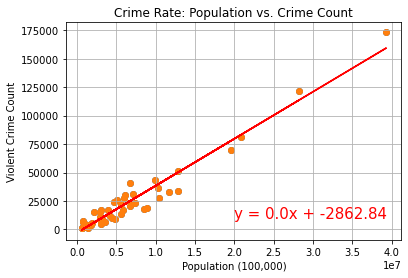

In [24]:
# Show Crime Rate as Crime Count vs. Population
plt.scatter(censusCrimeData['Population'],censusCrimeData['Violent Crime Count'])
# Add the linear regression equation and line to plot
plt.title("Crime Rate: Population vs. Crime Count")
x_values = censusCrimeData['Population']
y_values = censusCrimeData['Violent Crime Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20000000,10000),fontsize=15,color="red")
plt.xlabel('Population (100,000)')
plt.ylabel('Violent Crime Count')
plt.grid()
plt.savefig('Output/crimerate-PopVsCrimeCount.png', bbox_inches="tight")
# x = [0, 5, 10, 15, 20, 25, 30, 35, 40000000]
# default_x_ticks = range(len(x))
# plt.xticks(default_x_ticks, x)
# plt.subplots_adjust(left=0.25)
plt.show()

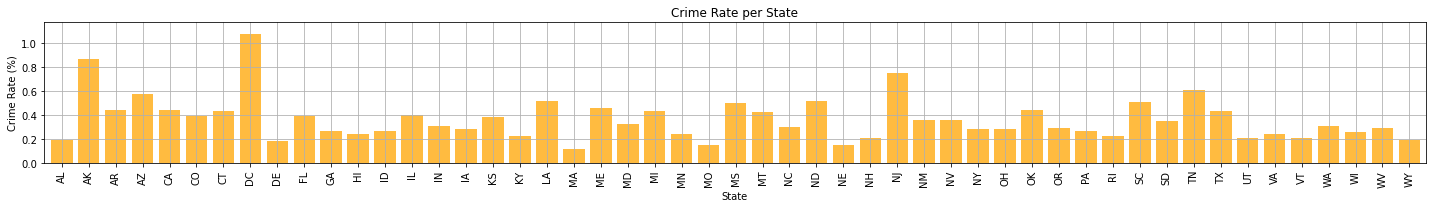

In [42]:
# Bar chart illustrating crime rate per state
stateAbbs = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
            'KY', 'LA', 'MA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 
            'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
# Set x axis and tick locations
x_axis = np.arange(len(stateAbbs))
tick_locations = [value+0.4 for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, censusCrimeData["Crime Rate"], color='orange', alpha=0.75, align="edge")
plt.xticks(tick_locations, stateAbbs, rotation="vertical")
plt.grid()

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(censusCrimeData["Crime Rate"])+.1)

# Set a Title and labels
plt.title("Crime Rate per State")
plt.xlabel("State")
plt.ylabel("Crime Rate (%)")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Output/CrimeRatePerState.png")
plt.show()

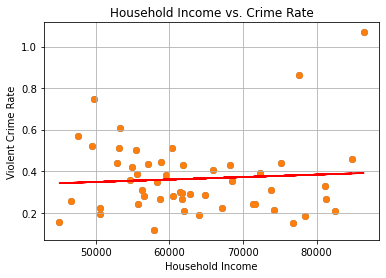

In [41]:
plt.scatter(censusCrimeData['Household Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Household Income']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(45000,6000),fontsize=15,color="red")
plt.title("Household Income vs. Crime Rate")
plt.xlabel('Household Income')
plt.ylabel('Violent Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsHouseIncome.png', bbox_inches="tight")
plt.show()

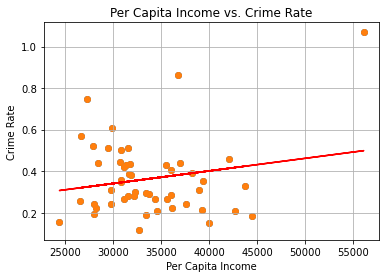

In [43]:
plt.scatter(censusCrimeData['Per Capita Income'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Per Capita Income']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Per Capita Income vs. Crime Rate")
plt.xlabel('Per Capita Income')
plt.ylabel('Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsPerCapitaIncome.png', bbox_inches="tight")
plt.show()

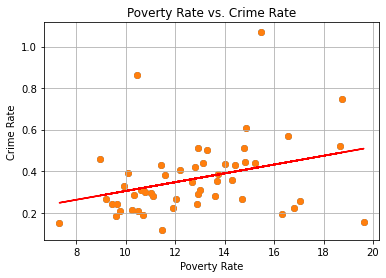

In [44]:

plt.scatter(censusCrimeData['Poverty Rate'],censusCrimeData['Crime Rate'])

# Add the linear regression equation and line to plot
x_values = censusCrimeData['Poverty Rate']
y_values = censusCrimeData['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(450,60),fontsize=15,color="red")
plt.title("Poverty Rate vs. Crime Rate")
plt.xlabel('Poverty Rate')
plt.ylabel('Crime Rate')
plt.grid()
plt.savefig('Output/crimeVsPoverty.png', bbox_inches="tight")
plt.show()